<a href="https://colab.research.google.com/github/Raksh-iscool/Tasks/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clone the repo
!git clone https://github.com/patilankita79/ImageSegmentationUsing_KMeans.git




# Run for an example image
!python ImageSegmentationUsingKMeans.py sample_images/image1.jpg


Cloning into 'ImageSegmentationUsing_KMeans'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41 (from 1)
Receiving objects: 100% (41/41), 3.79 MiB | 7.67 MiB/s, done.
Resolving deltas: 100% (7/7), done.
python3: can't open file '/content/ImageSegmentationUsingKMeans.py': [Errno 2] No such file or directory


In [3]:
!cd /content/ImageSegmentationUsing_KMeans/ImageSegmentation

In [4]:
# Install dependencies
!pip install opencv-python numpy

In [6]:
# Run for an example image
!python ImageSegmentationUsingKMeans.py Input/image1.jpg

python3: can't open file '/content/ImageSegmentationUsingKMeans.py': [Errno 2] No such file or directory


In [9]:
!python ImageSegmentationUsingKMeans.py


python3: can't open file '/content/ImageSegmentationUsingKMeans.py': [Errno 2] No such file or directory


In [8]:
!cd /content/ImageSegmentationUsing_KMeans/ImageSegmentation

In [13]:
import cv2
import numpy as np
import os

# Corrected folder paths
input_dir = 'ImageSegmentationUsing_KMeans/ImageSegmentation/Input'
output_dir = 'ImageSegmentationUsing_KMeans/ImageSegmentation/clusteredImages'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# KMeans segmentation function
def segment_image_kmeans(image, k=3):
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((image.shape))
    return segmented_image

# Process all images
for file_name in os.listdir(input_dir):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        input_path = os.path.join(input_dir, file_name)
        image = cv2.imread(input_path)

        segmented = segment_image_kmeans(image, k=3)

        output_path = os.path.join(output_dir, f'segmented_{file_name}')
        cv2.imwrite(output_path, segmented)
        print(f"Saved segmented image: {output_path}")


Saved segmented image: ImageSegmentationUsing_KMeans/ImageSegmentation/clusteredImages/segmented_apple.jpg
Saved segmented image: ImageSegmentationUsing_KMeans/ImageSegmentation/clusteredImages/segmented_image3.jpg
Saved segmented image: ImageSegmentationUsing_KMeans/ImageSegmentation/clusteredImages/segmented_image2.jpg
Saved segmented image: ImageSegmentationUsing_KMeans/ImageSegmentation/clusteredImages/segmented_image1.jpg
Saved segmented image: ImageSegmentationUsing_KMeans/ImageSegmentation/clusteredImages/segmented_rainbow.jpg


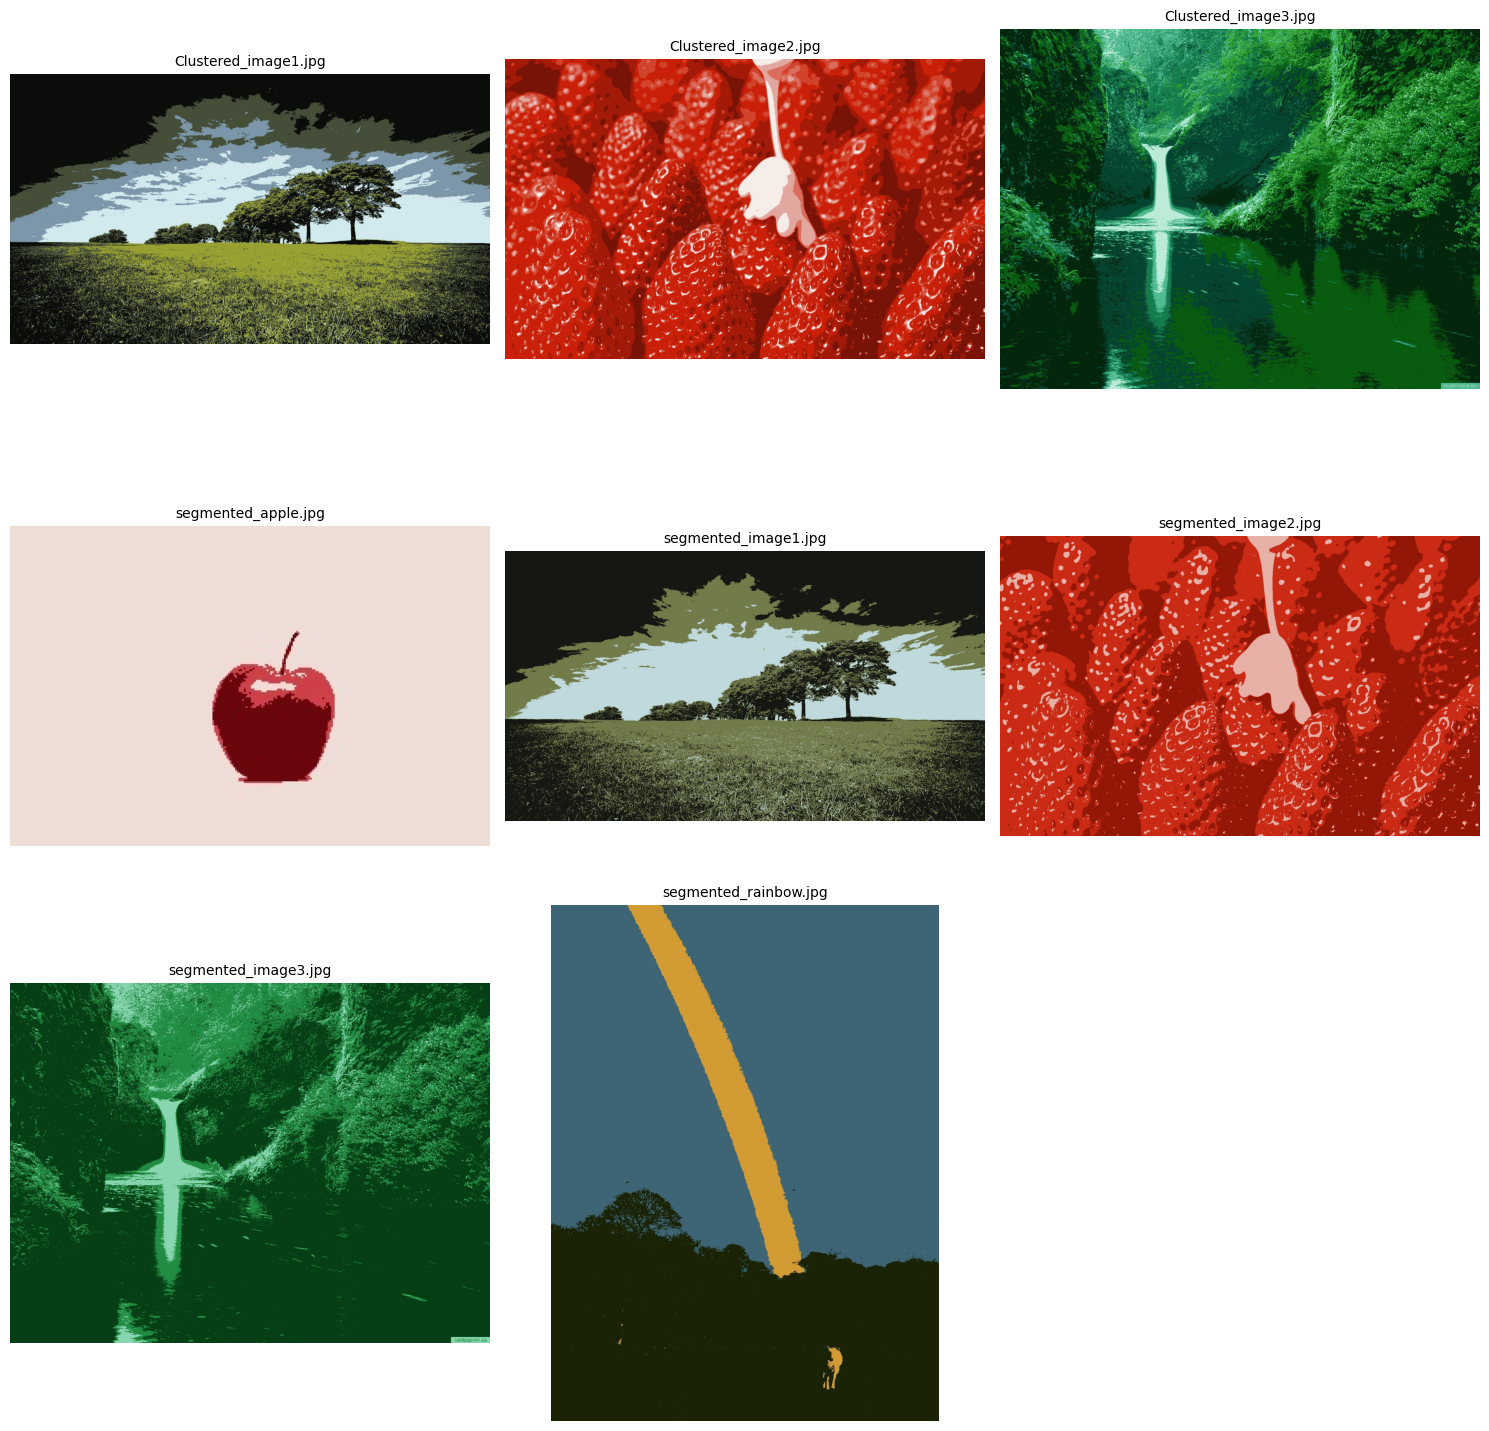

In [17]:
import os
import cv2
import math
from matplotlib import pyplot as plt

# Path to the clustered output images
output_dir = '/content/ImageSegmentationUsing_KMeans/ImageSegmentation/clusteredImages'

# Load image filenames
image_files = [f for f in os.listdir(output_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
image_files.sort()  # Optional: to maintain order

# Grid setup
cols = 3  # Number of images per row
rows = math.ceil(len(image_files) / cols)

# Set figure size
plt.figure(figsize=(15, 5 * rows))

# Display images in grid
for i, image_file in enumerate(image_files):
    image_path = os.path.join(output_dir, image_file)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(image_rgb)
    plt.title(image_file, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
